In [98]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

df = pd.read_table('fruit_data_with_colors.txt')
print(df.shape)
df.head()

(59, 7)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [96]:
print(df['fruit_name'].unique())
print('----')
print(df.groupby('fruit_name').size())

['apple' 'mandarin' 'orange' 'lemon']
----
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


<Figure size 432x288 with 0 Axes>

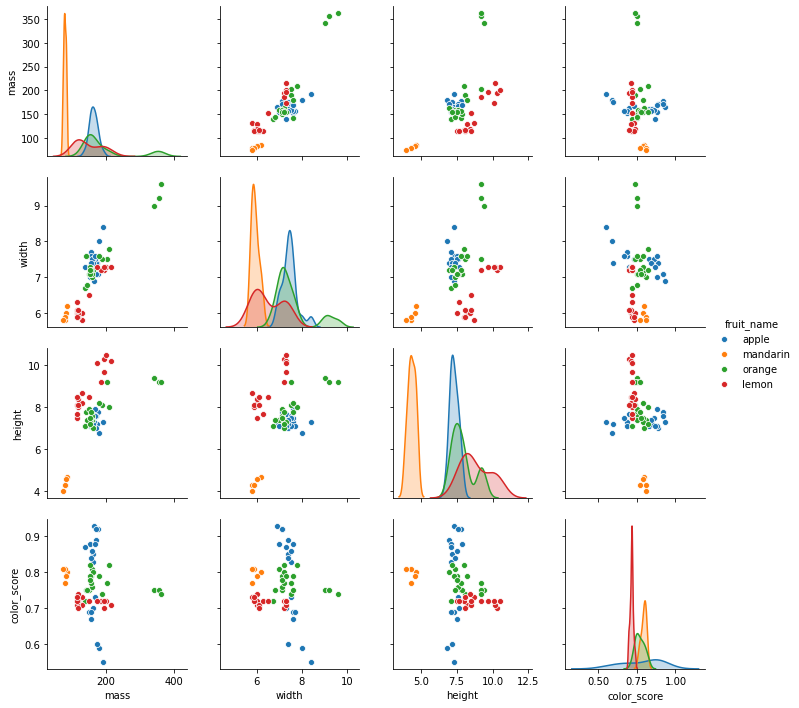

In [94]:
plt.figure()
sns.pairplot(df[['mass', 'width', 'height', 'color_score', 'fruit_name']], hue = "fruit_name", size=2.5)
plt.show();

In [101]:
# random.seed(10)
# data = np.random.rand(len(df)) < 0.8
# X = df[data]
# Y = df[~data]
# print(len(X))
# print(len(y))

In [100]:
from sklearn.model_selection import train_test_split

feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (44, 4)
y_train Shape:  (44,)
X_test Shape:  (15, 4)
y_test Shape:  (15,)


In [71]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.53


In [103]:
def normalize(data):
    result = data.copy()
    for feature_name in data.columns:
        max_value = data[feature_name].max()
        min_value = data[feature_name].min()
        result[feature_name] = (data[feature_name] - min_value) / (max_value - min_value)
    return result

train_normalized = normalize(X_train)
test_normalized = normalize(X_test)
train_normalized = train_normalized.to_numpy()
test_normalized = test_normalized.to_numpy()
train = X_train.to_numpy()
test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [77]:
class KNearestNeighbors:
    def __init__(self, k = 5):
        self.k = k

    def fit(self, X, y):
        self.train_data = X
        self.train_labels = y
        
    def euclideanDist(self, x1, x2):
        distance = math.sqrt(sum((x1 - x2)**2))
        return distance

    def predict(self, data):
        pred_labels = [self.single_prediction(i) for i in data]
        predictions = np.array(pred_labels)
        return predictions
    
    # 'single_prediction' is used when only one prediction needs to be made
    def single_prediction(self, data):
        # Compute distances between x and all examples in the training set
        distances = [self.euclideanDist(data, i) for i in self.train_data]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.train_labels[i] for i in k_idx]  
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]
    
    # accuracy calculation function
    def accuracy(self, true_labels, predicted_labels):
        correct = 0
        for i in range(0, len(true_labels)):
            if true_labels[i] == predicted_labels[i]:
                correct += 1
        accuracy = correct/len(true_labels) * 100  #accuracy 
        return '%.2f' % accuracy
       

In [106]:
model = KNearestNeighbors(3)
model.fit(train_normalized, y_train)
model.predict(test_normalized)
# print(model.single_prediction(test[10]))
# print(y_test[10])

# print("Train Accuracy: ", model.accuracy(y_test, model.predict(test_normalized)))
print("Test Accuracy: ", model.accuracy(y_test, model.predict(test_normalized)))


Test Accuracy:  80.00


In [107]:
knn = KNeighborsClassifier()
knn.fit(train_normalized, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_normalized, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_normalized, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.80
